In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Backpropagation

Now that we have an idea of how to measure the impact of variables on a function’s output, we can begin to write the code to calculate these partial derivatives to see their role in minimizing the model’s loss. Before applying this to a complete neural network, let’s start with a simplified forward pass with just one neuron. Rather than backpropagating from the loss function for a full neural network, let’s backpropagate the ReLU function for a single neuron and act as if we intend to minimize the output for this single neuron. We’re first doing this only as a demonstration to simplify the explanation, since minimizing the output from a ReLU activated neuron doesn’t serve any purpose other than as an exercise. Minimizing the loss value is our end goal, but in this case, we’ll start by showing how we can leverage the chain rule with derivatives and partial derivatives to calculate the impact of each variable on the ReLU activated output. We’ll also start by minimizing this more basic output before jumping to the full network and overall loss.
Let’s quickly recall the forward pass and atomic operations that we need to perform for this single neuron and ReLU activation. We’ll use an example neuron with 3 inputs, which means that it also has 3 weights and a bias:
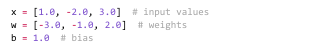

We then start with the first input, ​ x[​ 0 ​ ] ​ , and the related weight, ​ w[​ 0 ​ ] ​ :

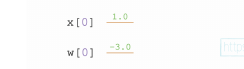
Figure 1:​ Beginning a forward pass with the first input and weight.

We have to multiply the input by the weight:
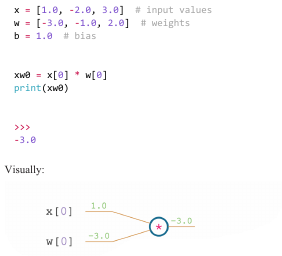
Figure 2:​ The first input and weight multiplication.

Let’s quickly recall the forward pass and atomic operations that we need to perform for this single neuron and ReLU activation. We’ll use an example neuron with 3 inputs, which means that it also has 3 weights and a bias:

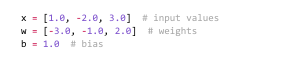
We then start with the first input, ​x[​0​]​, and the related weight, ​w[​0​]​:

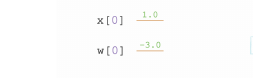
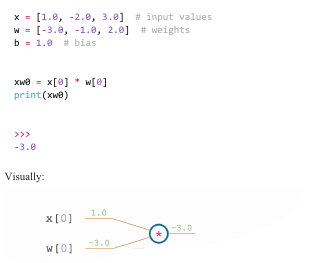


Figure 2:​ The first input and weight multiplication.

We repeat this operation for ​x1​, ​w1​ and ​x2​, ​w2​ pairs:

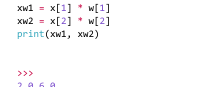

Visually:
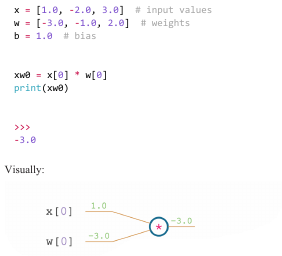

Figure 3:​ Input and weight multiplication of all of the inputs.

Code all together:

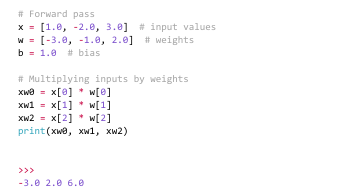

The next operation to perform is a sum of all weighted inputs with a bias:

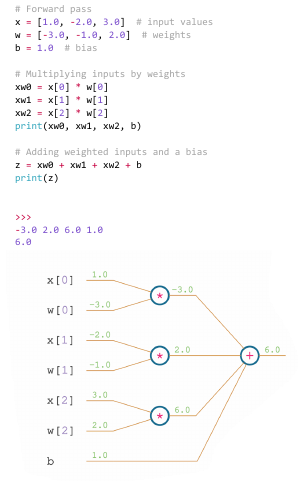
Figure 4:​ Weighted inputs and bias addition.

This forms the neuron’s output. The last step is to apply the ReLU activation function on this output:
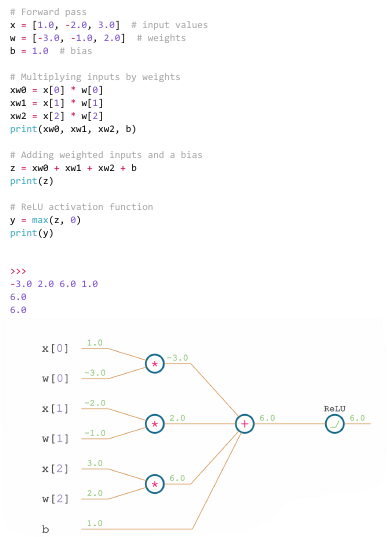



Figure 5:​ ReLU activation applied to the neuron output.

11 This is the full forward pass through a single neuron and a ReLU activation function. Let’s treat all of these chained functions as one big function which takes input values (​x​), weights (​w)​ , and bias (​b​), as inputs, and outputs ​y.​ This big function consists of multiple simpler functions — there is a multiplication of input values and weights, sum of these values and bias, as well as a ​max function as the ReLU activation — 3 chained functions in total: The first step is to backpropagate our gradients by calculating derivatives and partial derivatives with respect to each of our parameters and inputs. To do this, we’re going to use the ​chain rule​. Recall that the chain rule for a function stipulates that the derivative for nested functions like f(g(x))​ solves to:

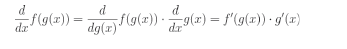

This big function that we just mentioned can be, in the context of our neural network, loosely interpreted as:

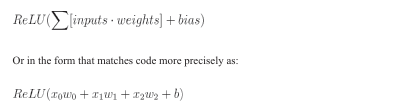

Our current task is to calculate how much each of the inputs, weights, and a bias impacts the output. We’ll start by considering what we need to calculate for the partial derivative of ​w​0,​ for example. But first, let’s rewrite our equation to the form that will allow us to determine how to calculate the derivatives more easily:

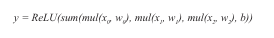
The above equation contains 3 nested functions: ​ReLU,​ a sum of weighted inputs and a bias, and multiplications of the inputs and weights. To calculate the impact of the example weight, ​w​0,​ on the output, the chain rule tells us to calculate the derivative of ​ReLU​ with respect to its parameter, which is the sum, then multiply it with the partial derivative of the sum operation with respect to its ​mul(x​0,​ w​0)​ ​ input, as this input contains the parameter in question. Then, multiply this with the partial derivative of the multiplication operation with respect to the ​x​0​ input. Let’s see this in a simplified equation:

This is the full forward pass through a single neuron and a ReLU activation function. Let’s treat all of these chained functions as one big function which takes input values (​x​), weights (​w)​ , and bias (​b​), as inputs, and outputs ​y.​ This big function consists of multiple simpler functions — there is a multiplication of input values and weights, sum of these values and bias, as well as a ​max function as the ReLU activation — 3 chained functions in total: The first step is to backpropagate our gradients by calculating derivatives and partial derivatives with respect to each of our parameters and inputs. To do this, we’re going to use the ​chain rule​. Recall that the chain rule for a function stipulates that the derivative for nested functions like f(g(x))​ solves to:


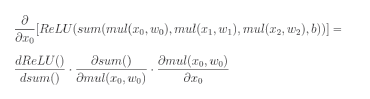

For legibility, we did not denote the ​ReLU(​ ) parameter, which is the full sum, and the sum parameters, which are all of the multiplications of inputs and weights. We excluded this because the equation would be longer and harder to read. This equation shows that we have to calculate the derivatives and partial derivatives of all of the atomic operations and multiply them to acquire the impact that x​0​ makes on the output. We can then repeat this to calculate all of the other remaining impacts. The derivatives with respect to the weights and a bias will inform us about their impact and will be used to update these weights and bias. The derivatives with respect to inputs are used to chain more layers by passing them to the previous function in the chain. We’ll have multiple chained layers of neurons in the neural network model, followed by the loss function. We want to know the impact of a given weight or bias on the loss. That means that we will have to calculate the derivative of the loss function (which we’ll do later in this chapter) and apply the chain rule with the derivatives of all activation functions and neurons in all of the consecutive layers. The derivative with respect to the layer’s inputs, as opposed to the derivative with respect to the weights and biases, is not used to update any parameters. Instead, it is used to chain to another layer (which is why we backpropagate to the previous layer in a chain). During the backward pass, we’ll calculate the derivative of the loss function, and use it to multiply with the derivative of the activation function of the output layer, then use this result to multiply by the derivative of the output layer, and so on, through all of the hidden layers and activation functions. Inside these layers, the derivative with respect to the weights and biases will form the gradients that we’ll use to update the weights and biases. The derivatives with respect to inputs will form the gradient to chain with the previous layer. This layer can calculate the impact of its weights and biases on the loss and backpropagate gradients on inputs further. For this example, let’s assume that our neuron receives a gradient of ​1​ from the next layer. We’re making up this value for demonstration purposes, and a value of ​1​ won’t change the values, which means that we can more easily show all of the processes. We are going to use the color of red for derivatives:

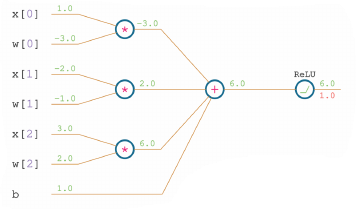
Figure 6:​ Initial gradient (received during backpropagation).

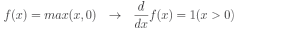

We can write that in Python as:


Where the ​drelu_dz​ means the derivative of the ​ReLU​ function with respect to ​z​ — we used ​z instead of ​x​ from the equation since the equation denotes the ​max​ function in general, and we are applying it to the neuron’s output, which is ​z.​ The input value to the ​ReLU​ function is ​6​, so the derivative equals ​1​. We have to use the chain rule and multiply this derivative with the derivative received from the next layer, which is ​1​ for the purpose of this example:

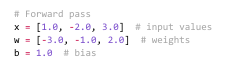

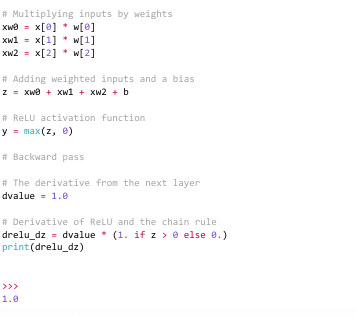

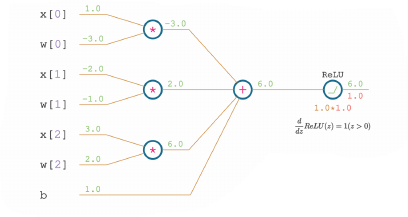
Figure 7:​ Derivative of the ReLU function and chain rule.

This results with the derivative of ​1:​
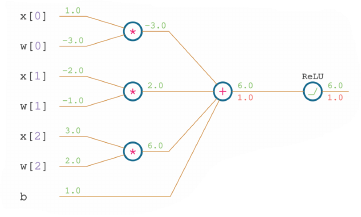
Figure 8:​ ReLU and chain rule gradient.

Moving backward through our neural network, what is the function that comes immediately before we perform the activation function? It’s a sum of the weighted inputs and bias. This means that we want to calculate the partial derivative of the sum function, and then, using the chain rule, multiply this by the partial derivative of the subsequent, outer, function, which is ​ReLU​. We’ll call these results the:
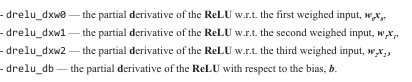

The partial derivative of the sum operation is always ​1​, no matter the inputs:
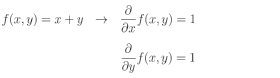

The weighted inputs and bias are summed at this stage. So we will calculate the partial derivatives of the sum operation with respect to each of these, multiplied by the partial derivative for the subsequent function (using the chain rule), which is the ​ReLU​ function, denoted by ​drelu_dz
For the first partial derivative:

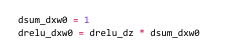

To be clear, the ​dsum_dxw0​ above means the partial ​d​erivative of the ​sum​ with respect to the ​x (input), ​w​eighted, for the ​0​th pair of inputs and weights. ​1​ is the value of this partial derivative, which we multiply, using the chain rule, with the derivative of the subsequent function, which is the ​ReLU​ function. Again, we have to apply the chain rule and multiply the derivative of the ReLU function with the partial derivative of the sum, with respect to the first weighted input:

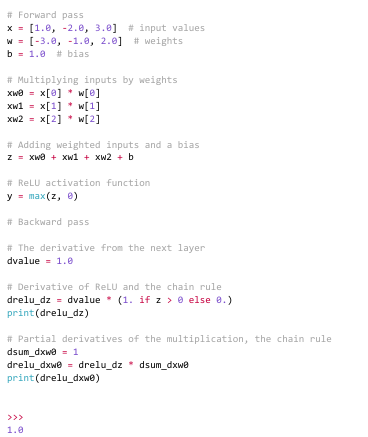

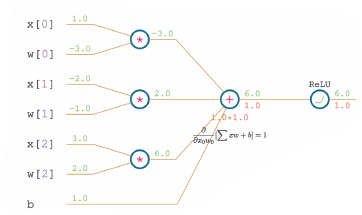
Figure 9:​ Partial derivative of the sum function w.r.t. the first weighted input; the chain rule. 

This results with a partial derivative of 1 again:

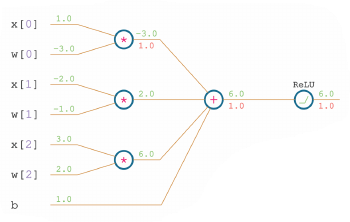
Figure 10:​ The sum and chain rule gradient (for the first weighted input).

We can then perform the same operation with the next weighed input:

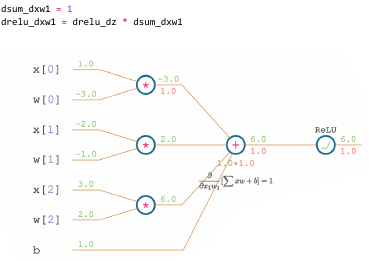
Figure 11:​ Partial derivative of the sum function w.r.t. the second weighted input; the chain rule.

Which results with the next calculated partial derivative:

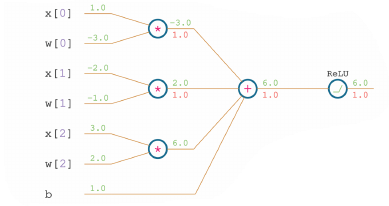

Figure 12:​ The sum and chain rule gradient (for the second weighted input).
And the last weighted input:

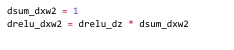

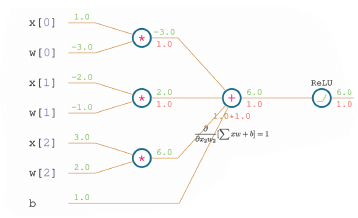
Figure 13:​ Partial derivative of the sum function w.r.t. the third weighted input; the chain rule.

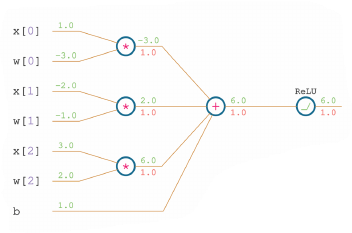
Figure 14:​ The sum and chain rule gradient (for the third weighted input).

Then the bias:

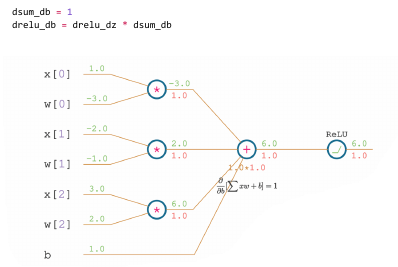
Figure 15:​ Partial derivative of the sum function w.r.t. the bias; the chain rule.

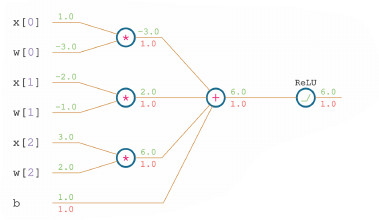
Figure 16:​ The sum and chain rule gradient (for the bias).

Let’s add these partial derivatives, with the applied chain rule, to our code:
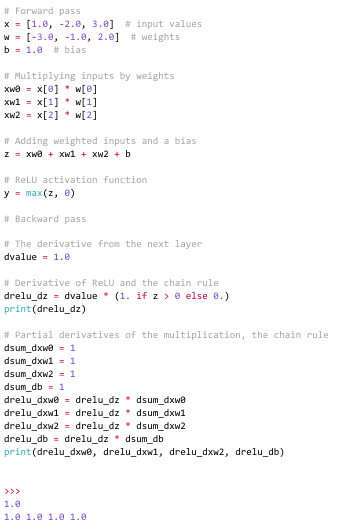

Continuing backward, the function that comes before the sum is the multiplication of weights and inputs. The derivative for a product is whatever the input is being multiplied by. Recall:

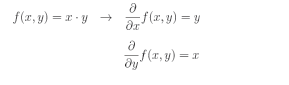




The partial derivative of ​f​ with respect to ​x​ equals ​y.​ The partial derivative of ​f​ with respect to ​y equals ​x​. Following this rule, the partial derivative of the first ​weighted input​ with respect to the input​ equals the ​weight​ (the other input of this function). Then, we have to apply the chain rule and multiply this partial derivative with the partial derivative of the subsequent function, which is the sum (we just calculated its partial derivative earlier in this chapter):

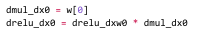

This means that we are calculating the partial derivative with respect to the ​x​0​ input, the value of which is ​w0​ ​, and we are applying the chain rule with the derivative of the subsequent function, which is ​drelu_dxw0​. This is a good time to point out that, as we apply the chain rule in this way — working backward by taking the ​ReLU()​ derivative, taking the summing operation’s derivative, multiplying both, and so on, this is a process called ​backpropagation​ using the ​chain rule​. As the name implies, the resulting output function’s gradients are passed back through the neural network, using multiplication of the gradient of subsequent functions from later layers with the current one. Let’s add this partial derivative to the code and show it on the chart:

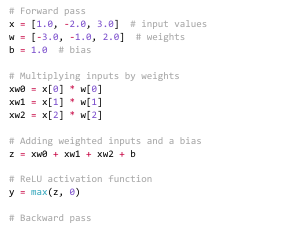

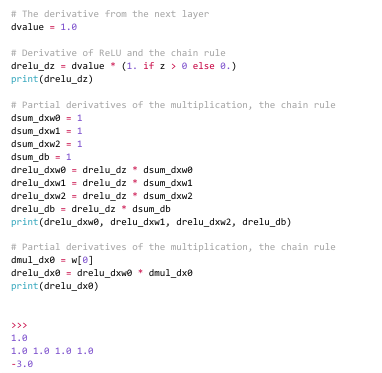

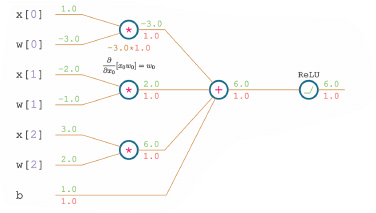
Figure 17:​ Partial derivative of the multiplication function w.r.t. the first input; the chain rule.
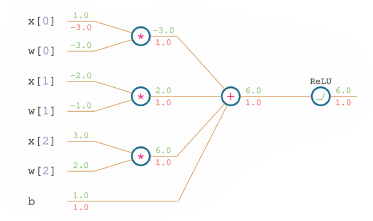
Figure 18:​ The multiplication and chain rule gradient (for the first input).

We perform the same operation for other inputs and weights:

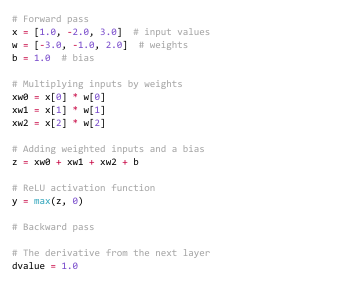

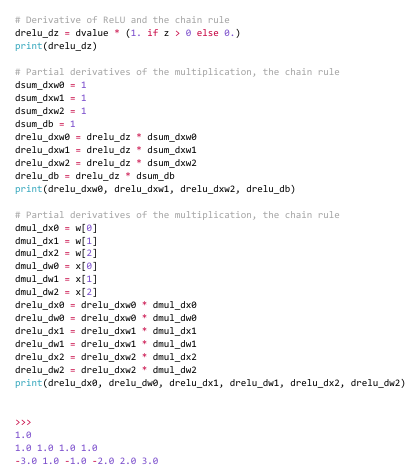

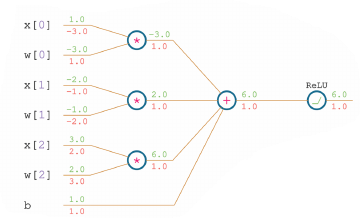

Figure 19:​ Complete backpropagation graph.

That’s the complete set of the activated neuron’s partial derivatives with respect to the inputs, weights and a bias. Recall the equation from the beginning of this chapter:

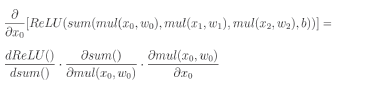

Since we have the complete code and we are applying the chain rule from this equation, let’s see what we can optimize in these calculations. We applied the chain rule to calculate the partial derivative of the ReLU activation function with respect to the first input, ​x​0.​ In our code, let’s take the related lines of the code and simplify them:
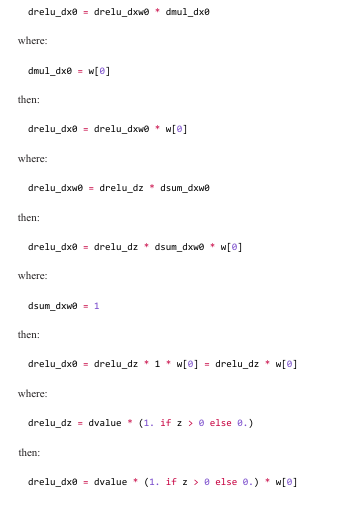

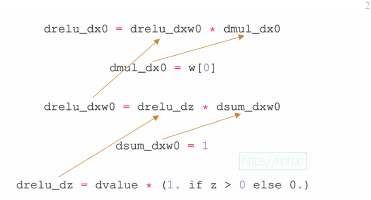

Figure 20:​ How to apply the chain rule for the partial derivative of ReLU w.r.t. first input

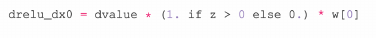

Figure 21:​ The chain rule applied for the partial derivative of ReLU w.r.t. first input

In this equation, starting from the left-hand side, is the derivative calculated in the next layer, with respect to its inputs — this is the gradient backpropagated to the current layer, which is the derivative of the ​ReLU​ function, and the partial derivative of the neuron’s function with respect to the ​x0​ ​ input. This is all multiplied by applying the chain rule to calculate the impact of the input to the neuron on the whole function’s output. The partial derivative of a neuron’s function, with respect to the weight, is the input related to this weight, and, with respect to the input, is the related weight. The partial derivative of the neuron’s function with respect to the bias is always 1. We multiply them with the derivative of the subsequent function (which was ​1​ in this example) to get the final derivatives. We are going to code all of these derivatives in the Dense layer’s class and the ReLU activation class for the backpropagation step.
All together, the partial derivatives above, combined into a vector, make up our gradients. Our gradients could be represented as:

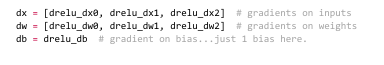

For this single neuron example, we also won’t need our ​dx​. With many layers, we will continue backpropagating to preceding layers with the partial derivative with respect to our inputs. Continuing the single neuron example, we can now apply these gradients to the weights to hopefully minimize the output. This is typically the purpose of the​ optimizer ​(discussed in the following chapter), but we can show a simplified version of this task by directly applying a negative fraction of the gradient to our weights. We apply a negative fraction to this gradient since we want to decrease the final output value, and the gradient shows the direction of the steepest ascent. For example, our current weights and bias are:

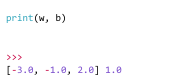

We can then apply a fraction of the gradients to these values:

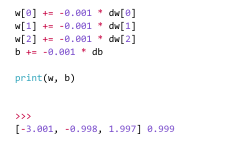
Now, we’ve slightly changed the weights and bias in such a way so as to decrease the output somewhat intelligently. We can see the effects of our tweaks on the output by doing another forward pass:

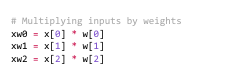

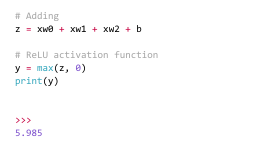

We’ve successfully decreased this neuron’s output from 6.000 to 5.985. Note that it does not make sense to decrease the neuron’s output in a real neural network; we were doing this purely as a simpler exercise than the full network. We want to decrease the loss value, which is the last calculation in the chain of calculations during the forward pass, and it’s the first one to calculate the gradient during the backpropagation. We’ve minimized the ReLU output of a single neuron only for the purpose of this example to show that we actually managed to decrease the value of chained functions intelligently using the derivatives, partial derivatives, and chain rule. Now, we’ll apply the one-neuron example to the list of samples and expand it to an entire layer of neurons. To begin, let’s set a list of 3 samples for input, where each sample consists of 4 features. For this example, our network will consist of a single hidden layer, containing 3 neurons (lists of 3 weight sets and 3 biases). We’re not going to describe the forward pass again, but the backward pass, in this case, needs further explanation. So far, we have performed an example backward pass with a single neuron, which received a singular derivative to apply the chain rule. Let’s consider multiple neurons in the following layer. A single neuron of the current layer connects to all of them — they all receive the output of this neuron. What will happen during backpropagation? Each neuron from the next layer will return a partial derivative of its function with respect to this input. The neuron in the current layer will receive a vector consisting of these derivatives. We need this to be a singular value for a singular neuron. To continue backpropagation, we need to sum this vector. Now, let’s replace the current singular neuron with a layer of neurons. As opposed to a single neuron, a layer outputs a vector of values instead of a singular value. Each neuron in a layer connects to all of the neurons in the next layer. During backpropagation, each neuron from the current layer will receive a vector of partial derivatives the same way that we described for a single neuron. With a layer of neurons, it’ll take the form of a list of these vectors, or a 2D array. We know that we need to perform a sum, but what should we sum and what is the result supposed to be? Each neuron is going to output a gradient of the partial derivatives with respect to all of its inputs, and all neurons will form a list of these vectors. We need to sum along the inputs — the first input to all of the neurons, the second input, and so on. We’ll have to sum columns.

To calculate the partial derivatives with respect to inputs, we need the weights — the partial derivative with respect to the input equals the related weight. This means that the array of partial derivatives with respect to all of the inputs equals the array of weights. Since this array is transposed, we’ll need to sum its rows instead of columns. To apply the chain rule, we need to multiply them by the gradient from the subsequent function. In the code to show this, we take the transposed weights, which are the transposed array of the derivatives with respect to inputs, and multiply them by their respective gradients (related to given neurons) to apply the chain rule. Then we sum along with the inputs. Then we calculate the gradient for the next layer in backpropagation. The “next” layer in backpropagation is the previous layer in the order of creation of the model:


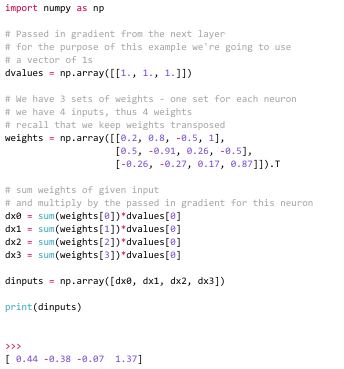
dinputs​ is a gradient of the neuron function with respect to inputs.
We defined the gradient of the subsequent function (dvalues) as a row vector, which we’ll explain shortly. From NumPy’s perspective, and since both weights and dvalues are NumPy arrays, we can simplify the dx0 to dx3 calculation. Since the weights array is formatted so that the rows contain weights related to each input (weights for all neurons for the given input), we can multiply them by the gradient vector directly:

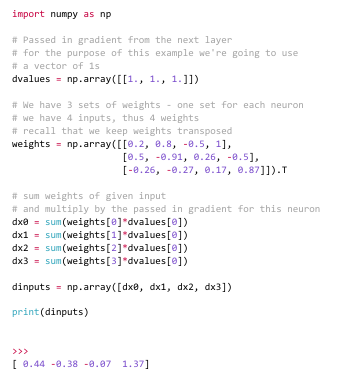

You might already see where we are going with this — the sum of the multiplication of the elements is the dot product. We can achieve the same result by using the ​np.dot​ function. For this to be possible, we need to match the “inner” shapes and decide the first dimension of the result, which is the first dimension of the first parameter. We want the output of this calculation to be of the shape of the gradient from the subsequent function — recall that we have one partial derivative for each neuron and multiply it by the neuron’s partial derivative with respect to its input. We then want to multiply each of these gradients with each of the partial derivatives that are related to this neuron’s inputs, and we already noticed that they are rows. The dot product takes rows from the first argument and columns from the second to perform multiplication and sum; thus, we need to transpose the weights for this calculation:


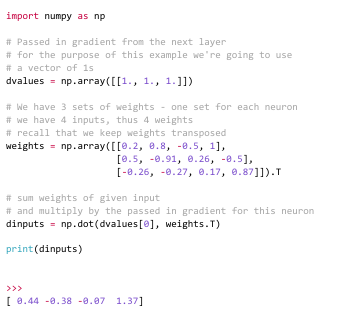

We have to account for one more thing — a batch of samples. So far, we have been using a single sample responsible for a single gradient vector that is backpropagated between layers. The row vector that we created for ​dvalues​ is in preparation for a batch of data. With more samples, the layer will return a list of gradients, which we ​almost​ handle correctly for. Let’s replace the singular gradient ​dvalues[​0​]​ with a full list of gradients, ​dvalues​, and add more example gradients to this list:
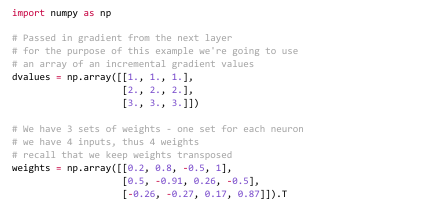
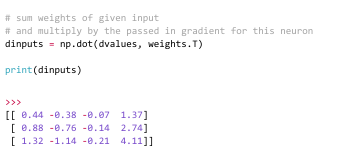

Calculating the gradients with respect to weights is very similar, but, in this case, we’re going to be using gradients to update the weights, so we need to match the shape of weights, not inputs. Since the derivative with respect to the weights equals inputs, weights are transposed, so we need to transpose inputs to receive the derivative of the neuron with respect to weights. Then we use these transposed inputs as the first parameter to the dot product — the dot product is going to multiply rows by inputs, where each row, as it is transposed, contains data for a given input for all of the samples, by the columns of ​dvalues​. These columns are related to the outputs of singular neurons for all of the samples, so the result will contain an array with the shape of the weights, containing the gradients with respect to the inputs, multiplied with the incoming gradient for all of the samples in the batch:

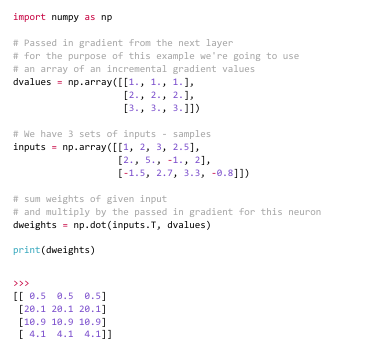
This output’s shape matches the shape of weights because we summed the inputs for each weight and then multiplied them by the input gradient. ​dweights​ is a gradient of the neuron function with respect to the weights. For the biases and derivatives with respect to them, the derivatives come from the sum operation and always equal 1, multiplied by the incoming gradients to apply the chain rule. Since gradients are a list of gradients (a vector of gradients for each neuron for all samples), we just have to sum them with the neurons, column-wise, along axis 0.

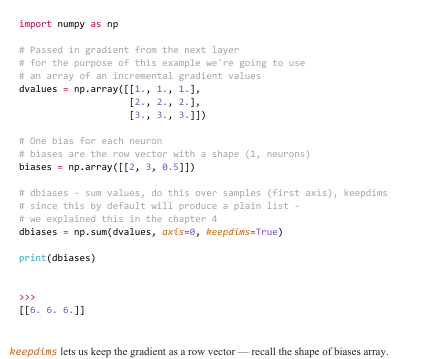

The last thing to cover here is the derivative of the ReLU function. It equals ​1​ if the input is greater than ​0​ and ​0​ otherwise. The layer passes its outputs through the ​ReLU()​ activation during the forward pass. For the backward pass, ​ReLU()​ receives a gradient of the same shape. The derivative of the ReLU function will form an array of the same shape, filled with 1 when the related input is greater than 0, and 0 otherwise. To apply the chain rule, we need to multiply this array with the gradients of the following function:
This output’s shape matches the shape of weights because we summed the inputs for each weight and then multiplied them by the input gradient. ​dweights​ is a gradient of the neuron function with respect to the weights. For the biases and derivatives with respect to them, the derivatives come from the sum operation and always equal 1, multiplied by the incoming gradients to apply the chain rule. Since gradients are a list of gradients (a vector of gradients for each neuron for all samples), we just have to sum them with the neurons, column-wise, along axis 0.

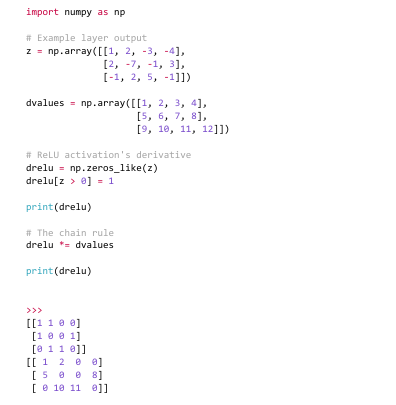

To calculate the ReLU derivative, we created an array filled with zeros. ​np.zeros_like​ is a NumPy function that creates an array filled with zeros, with the shape of the array from its parameter, the ​z​ array in our case, which is an example output of the neuron. Following the ReLU()​ derivative, we then set the values related to the inputs greater than ​0 a​ s 1. We then print this table to see and compare it to the gradients. In the end, we multiply this array with the gradient of the subsequent function and print the result. We can now simplify this operation. Since the ​ReLU()​ derivative array is filled with 1s, which do not change the values multiplied by them, and 0s that zero the multiplying value, this means that we can take the gradients of the subsequent function and set to 0 all of the values that correspond to the ​ReLU()​ input and are equal to or less than 0:


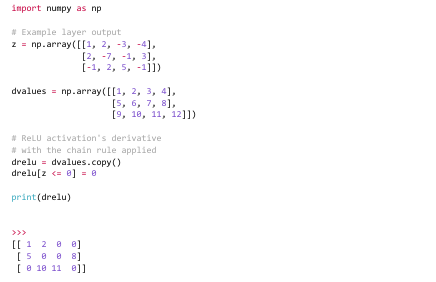

The copy of ​dvalues​ ensures that we don’t modify it during the ReLU derivative calculation. Let’s combine the forward and backward pass of a single neuron with a full layer and batch-based partial derivatives. We’ll minimize ReLU’s output, once again, only for this example:
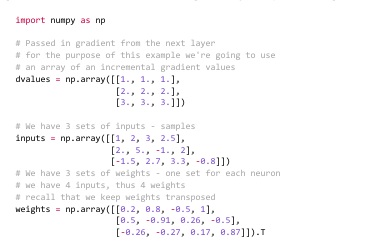

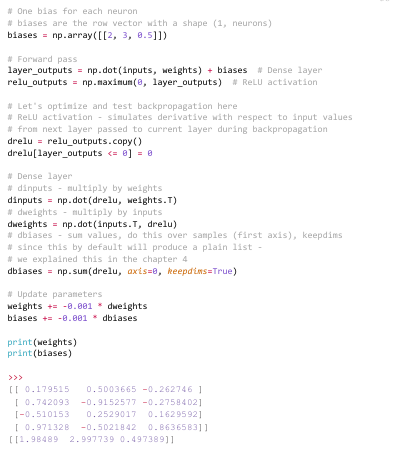

In this code, we replaced the plain Python functions with NumPy variants, created example data, calculated the forward and backward passes, and updated the parameters. Now we will update the dense layer and ReLU activation code with a ​backward​ method (for backpropagation), which we’ll call during the backpropagation phase of our model.

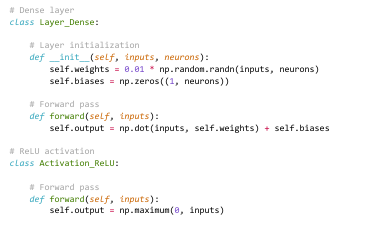

During the ​forward​ method for our ​Layer_Dense​ class, we will want to remember what the inputs were (recall that we’ll need them when calculating the partial derivative with respect to weights during backpropagation), which can be easily implemented using an object property (​self.inputs​):

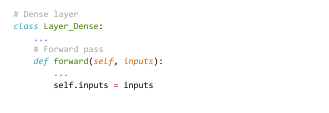
Next, we will add our backward pass (backpropagation) code that we developed previously into a new method in the layer class, which we’ll call ​backward​:

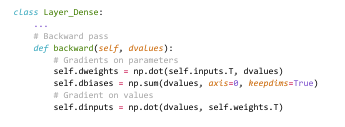

We then do the same for our ReLU class:
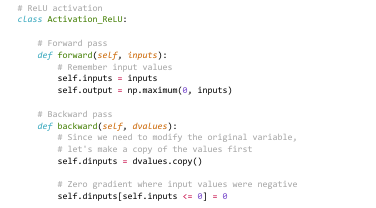

By this point, we’ve covered everything we need to perform backpropagation, except for the derivative of the Softmax activation function and the derivative of the cross-entropy loss function.


## Categorical Cross-Entropy loss derivative

If you are not interested in the mathematical derivation of the Categorical Cross-Entropy loss, feel free to skip to the code implementation, as derivatives are known for common loss functions, and you won’t necessarily need to know how to solve them. It is a good exercise if you plan to create custom loss functions, though.

As we learned in chapter 5, the Categorical Cross-Entropy loss function’s formula is:

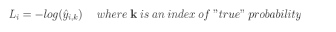
Where ​L​i​ denotes sample loss value, ​i​ — ​i-​ th sample in a set, ​k​ — index of the target label (ground-true label), ​y​ — target values and ​y-hat​ — predicted values. This formula is convenient when calculating the loss value itself, as all we need is the output of the Softmax activation function at the index of the correct class. For the purpose of the derivative calculation, we’ll use the full equation mentioned back in derivatives chapter.

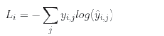

Where ​L​i​ denotes sample loss value, ​i​ — ​i-​ th sample in a set, ​j​ — label/output index, ​y​ — target values and ​y-hat​ — predicted values. We’ll use this full function because our current goal is to calculate the gradient, which is composed of the partial derivatives of the loss function with respect to each of its inputs (being the outputs of the Softmax activation function). This means that we cannot use the equation, which takes just the value at the index of the correct class (the first equation above). To calculate partial derivatives with respect to each of the inputs, we need an equation that takes all of them as parameters, thus the choice to use the full equation. First, let’s define the gradient equation:

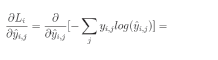

We defined the equation here as the partial derivative of the loss function with respect to each of its inputs. We already learned that the derivative of the sum equals the sum of the derivatives. We also learned that we can move constants. An example is ​yi,j​ ​, as it is not what we are calculating the derivative with respect to. Let’s apply these transforms:
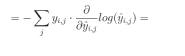
Now we have to solve the derivative of the logarithmic function, which is the reciprocal of its parameter, multiplied (using the chain rule) by the partial derivative of this parameter — using prime (also called Lagrange’s) notation:

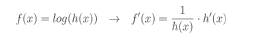

We can solve it further (using Leibniz’s notation in this case):

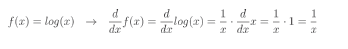

Let’s apply this derivative:

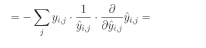

The partial derivative of a value with respect to this value equals 1:

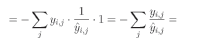


Since we are calculating the partial derivative with respect to the ​y​ given ​j,​ the sum is being performed over a single element and can be omitted:

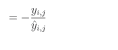

Full solution:

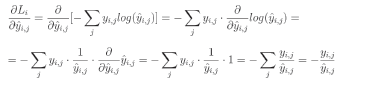

The derivative of this loss function with respect to its inputs (predicted values at the i-th sample, since we are interested in a gradient with respect to the predicted values) equals the negative ground-truth vector, divided by the vector of the predicted values (which is also the output vector of the softmax function).



## Categorical Cross-Entropy loss derivative code implementation

Since we derived this equation and have found that it solves to a simple division operation of 2 values, we know that, with NumPy, we can extend this operation to the sample-wise vectors of ground truth and predicted values, and further to the batch-wise arrays of them. From the coding perspective, we need to add a backward method to the Loss_CategoricalCrossentropy class. We need to pass the array of predictions and the array of true values into it and calculate the negated division of them:
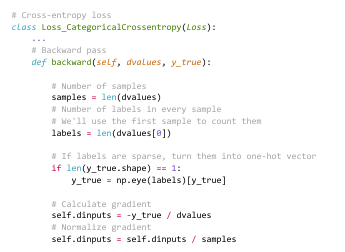

Along with the partial derivative calculation, we are performing two additional operations. First, we’re turning numerical labels into one-hot encoded vectors — prior to this, we need to check how many dimensions y_true consists of. If the shape of the labels returns a single dimension

(which means that they are shaped like a list and not like an array), they consist of discrete numbers and need to be converted to a list of one-hot encoded vectors — a two-dimensional array. If that’s the case, we need to turn them into one-hot encoded vectors. We’ll use the ​np.eye method which, given a number, ​n​, returns an ​nx​ ​n​ array filled with ones on the diagonal and zeros everywhere else. For example:


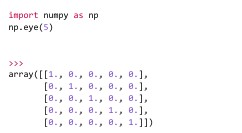

We can then index this table with the numerical label to get the one-hot encoded vector that represents it:
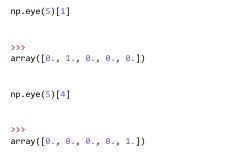

If ​y_true​ is already one-hot encoded, we do not perform this step. The second operation is the gradient normalization. As we’ll learn in the next chapter, optimizers sum all of the gradients related to each weight and bias before multiplying them by the learning rate (or some other factor). What this means, in our case, is that the more samples we have in a dataset, the more gradient sets we’ll receive at this step, and the bigger this sum will become. As a consequence, we’ll have to adjust the learning rate according to each set of samples. To solve this problem, we can divide all of the gradients by the number of samples. A sum of elements divided by a count of them is their mean value (and, as we mentioned, the optimizer will perform the sum) — this way, we’ll effectively normalize the gradients and make their sum’s magnitude invariant to the number of samples.

## Softmax activation derivative 

The next calculation that we need to perform is the partial derivative of the Softmax function, which is a bit more complicated task than the derivative of the Categorical Cross-Entropy loss. Let’s remind ourselves of the equation of the Softmax activation function and define the derivative:

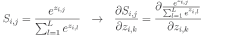

Where ​Si,j​ ​ denotes ​j​-th Softmax’s output of ​i​-th sample, ​z​ — input array which is a list of input vectors (output vectors from the previous layer), ​z​i,j​ — ​j​-th Softmax’s input of ​i​-th sample, ​L​ — number of inputs, ​z​i,k​ — ​k-​ th Softmax’s input of ​i-​ th sample. As we described in chapter 4, the Softmax function equals the exponentiated input divided by the sum of all exponentiated inputs. In other words, we need to exponentiate all of the values first, then divide each of them by the sum of all of them to perform the normalization. Each input to the Softmax impacts each of the outputs, and we need to calculate the partial derivative of each output with respect to each input. From the programming side of things, if we calculate the impact of one list on the other list, we’ll receive a matrix of values as a result. That’s exactly what we’ll calculate here — we’ll calculate the ​Jacobian matrix​ (which we’ll explain later) of the vectors, which we’ll dive deeper into soon. To calculate this derivative, we need to first define the derivative of the division operation:

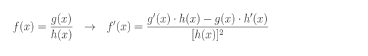

In order to calculate the derivative of the division operation, we need to take the derivative of the numerator multiplied by the denominator, subtract the numerator multiplied by the derivative of the denominator from it, and then divide the result by the squared denominator.

We can now start solving the derivative:

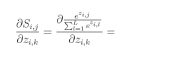

Let’s apply the derivative of the division operation:

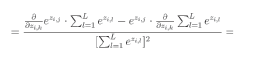

At this step, we have two partial derivatives present in the equation. For the one on the right side of the numerator (right side of the subtraction operator):

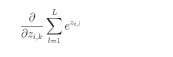

We need to calculate the derivative of the sum of the constant,​e​ (Euler’s number), raised to power z​i,l​ (where ​l​ denotes consecutive indices from ​1​ to the number of the Softmax outputs — ​L​) with respect to the ​zi,k ​ .​ The derivative of the sum operation is the sum of derivatives, and the derivative of the constant ​e​ raised to power ​n​ (​e​n)​ with respect to ​n​ equals ​en​ ​:

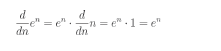

It is a special case when the derivative of an exponential function equals this exponential function itself, as its exponent is exactly what we are deriving with respect to, thus its derivative equals ​1.​ We also know that the range ​1...L​ contains ​k​ (​k​ is one of the indices from this range) exactly once and then, in this case, the derivative is going to equal ​e​ to the power of the ​zi,k ​ ​ (as ​j​ equals ​k)​ and ​0 otherwise (when ​j​ does not equal ​k​ as ​zi,l​ ​ won’t contain ​z​i,k​ and will be treated as a constant — The derivative of the constant equals ​0​):


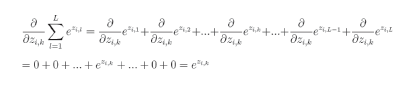

The derivative on the left side of the subtraction operator in the denominator is a slightly different case:

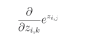

It does not contain the sum over all of the elements like the derivative we solved moments ago, so it can become either ​0​ if ​j≠k​ or ​e​ to the power of the ​zi,j​ ​ if ​j=k​. That means, starting from this step, we need to calculate the derivatives separately for both cases. Let’s start with ​j=k.​ In the case of ​j=k,​ the derivative on the left side is going to equal ​e​ to the power of the ​zi,j​ ​ and ​ the derivative on the right solves to the same value in both cases. Let’s substitute them:
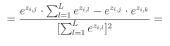


The numerator contains the constant ​e​ to the power of ​zi,j​ ​ in both the minuend (the value we are subtracting from) and subtrahend (the value we are subtracting from the minuend) of the subtraction operation. Because of this, we can regroup the numerator to contain this value multiplied by the subtraction of their current multipliers. We can also write the denominator as a multiplication of the value instead of using the power of ​2:​

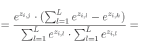

Then let’s split the whole equation into 2 parts:

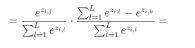

We moved ​e​ from the numerator and the sum from the denominator to its own fraction, and the content of the parentheses in the numerator, and the other sum from the denominator as another fraction, both joined by the multiplication operation. Now we can further split the “right” fraction into two separate fractions:
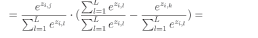

In this case, as it’s a subtraction operation, we separated both values from the numerator, dividing them both by the denominator and applying the subtraction operation between new fractions. If
we look closely, the “left” fraction turns into the Softmax function’s equation, as well as the “right” one, with the middle fraction solving to ​1​ as the numerator and the denominator are the same values:
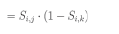

Note that the “left” Softmax function carries the ​j​ parameter, and the “right” one ​k​ — both came from their numerators, respectively. Full solution:

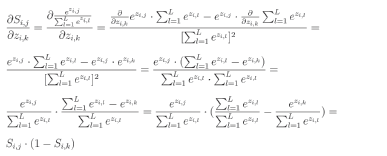

Now we have to go back and solve the derivative in the case of ​j≠k.​ In this case, the “left” derivative of the original equation solves to ​0​ as the whole expression is treated as a constant:

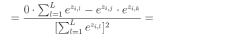

The difference is that now the whole subtrahend solves to ​0​, leaving us with just the minuend in the numerator:

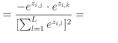
Now, exactly like before, we can write the denominator as the multiplication of the values instead of using the power of ​2​:

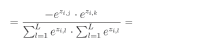

That lets us to split this fraction into 2 fractions, using the multiplication operation:

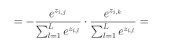

Now both fractions represent the Softmax function:



Note that the left Softmax function carries the ​j​ parameter, and the “right” one has ​k​ — both came from their numerators, respectively. Full solution:

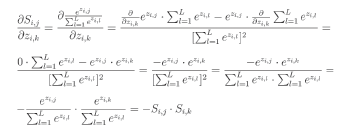

As a summary, the solution of the derivative of the Softmax function with respect to its inputs is:
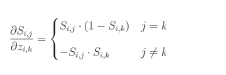

That’s not the end of the calculation that we can perform here. When left in this form, we’ll have 2 separate equations to code and use in different cases, which isn’t very convenient for the speed of calculations. We can, however, further morph the result of the second case of the derivative:


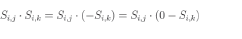

In the first step, we moved the second Softmax along the minus sign into the brackets so we can add a zero inside of them and right before this value. That does not change the solution, but now:

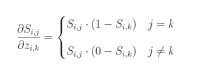

Both solutions look very similar, they differ only in a single value. Conveniently, there exists Kronecker delta​ function (which we’ll explain soon) whose equation is:

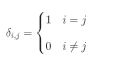

We can apply it here, simplifying our equation further to:
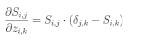


That’s the final math solution to the derivative of the Softmax function’s outputs with respect to each of its inputs. To make it a little bit easier to implement in Python using NumPy, let’s transform the equation for the last time:

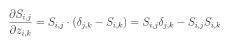
We basically multiplied ​S​i,j​ by both sides of the subtraction operation from the parentheses.




## Softmax activation derivative code implementation 

This lets us code the solution using just two NumPy functions, which we’ll explain now step by step:

Let’s make up a single sample:
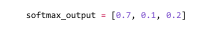

And shape it as a list of samples:

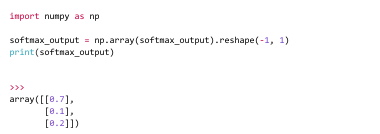

The left side of the equation is Softmax’s output multiplied by the Kronecker delta. The Kronecker delta equals ​1​ when both inputs are equal, and ​0​ otherwise. If we visualize this as an array, we’ll have an array of zeros with ones on the diagonal — you might remember that we already have implemented such a solution using the ​np.eye​ method:

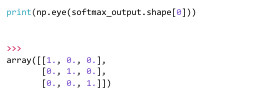

Now we’ll do the multiplication of both of the values from the equation part:

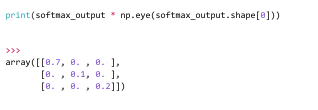

It turns out that we can gain some speed by replacing this by the ​np.diagflat​ method call, which computes the same solution — the diagflat method creates an array using an input vector as the diagonal:

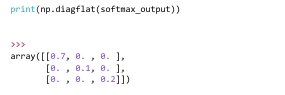

The other part of the equation is ​Si,j​ ​S​i,k​ — the multiplication of the Softmax outputs, iterating over the ​j​ and ​k​ indices respectively. Since, for each sample (the ​i​ index), we’ll have to multiply the values from the Softmax function’s output (in all of the combinations), we can use the dot product operation. For this, we’ll just have to transpose the second argument to get its row vector form (as described in chapter 2):

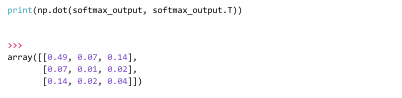
Finally, we can perform the subtraction of both arrays (following the equation):

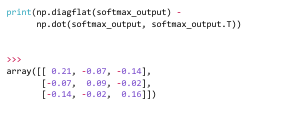


The matrix result of the equation and the array solution provided by the code is called the Jacobian matrix​. In our case, the Jacobian matrix is an array of partial derivatives in all of the combinations of both input vectors. Remember, we are calculating the partial derivatives of every output of the Softmax function with respect to each input separately. We do this because each input influences each output due to the normalization process, which takes the sum of all the exponentiated inputs. The result of this operation, performed on a batch of samples, is a list of the Jacobian matrices, which effectively forms a 3D matrix — you can visualize it as a column whose levels are Jacobian matrices being the sample-wise gradient of the Softmax function. This raises a question — if sample-wise gradients are the Jacobian matrices, how do we perform the chain rule with the gradient back-propagated from the loss function, since it’s a vector for each sample? Also, what do we do with the fact that the previous layer, which is the Dense layer, will expect the gradients to be a 2D array? Currently, we have a 3D array of the partial derivatives — a list of the Jacobian matrices. The derivative of the Softmax function with respect to any of its inputs returns a vector of partial derivatives (a row from the Jacobian matrix), as this input influences all the outputs, thus also influencing the partial derivative for each of them. We need to sum the values from these vectors so that each of the inputs for each of the samples will return a single partial derivative value instead. Because each input influences all of the outputs, the returned vector of the partial derivatives has to be summed up for the final partial derivative with respect to this input. We can perform this operation on each of the Jacobian matrices directly, applying the chain rule at the same time (applying the gradient from the loss function) using np.dot()​ — For each sample, it’ll take the row from the Jacobian matrix and multiply it by the corresponding value from the loss function’s gradient. As a result, the dot product of each of these vectors and values will return a singular value, forming a vector of the partial derivatives sample-wise and a 2D array (a list of the resulting vectors) batch-wise.

Let’s code the solution:

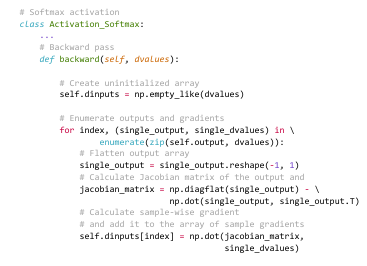

First, we created an empty array (which will become the resulting gradient array) with the same shape as the gradients that we’re receiving to apply the chain rule. The ​np.empty_like​ method creates an empty and uninitialized array. Uninitialized means that we can expect it to contain meaningless values, but we’ll set all of them shortly anyway, so there’s no need for initialization (for example, with zeros using ​np.zeros()​ instead). In the next step, we’re going to iterate sample-wise over pairs of the outputs and gradients, calculating the partial derivatives as described earlier and calculating the final product (applying the chain rule) of the Jacobian matrix and gradient vector (from the passed-in gradient array), storing the resulting vector as a row in the dinput array. We’re going to store each vector in each row while iterating, forming the output array.


## Common Categorical Cross-Entropy loss and Softmax activation derivative 

At the moment, we have calculated the partial derivatives of the Categorical Cross-Entropy loss and Softmax activation functions, and we can finally use them, but there is still one more step that we can perform to speed the calculations up. Different books and tutorials usually mention the derivative of the loss function with respect to the Softmax inputs, or even weight and biases of the output layer directly and don’t go into the details of the partial derivatives of these functions separately. This is partially because the derivatives of both functions combine to solve a simple equation — the whole code implementation is simpler and faster to execute. When we look at our current code, we perform multiple operations to calculate the gradients and even include a loop in the backward step of the activation function. Let’s apply the chain rule to calculate the partial derivative of the Categorical Cross-Entropy loss function with respect to the Softmax function inputs. First, let’s define this derivative by applying the chain rule:

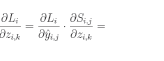

This partial derivative equals the partial derivative of the loss function with respect to its inputs, multiplied (using the chain rule) by the partial derivative of the activation function with respect to its inputs. Now we need to systematize semantics — we know that the inputs to the loss function, y-hati,j​ ​, are the outputs of the activation function, 

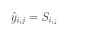

That means that we can update the equation to the form of:

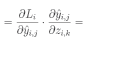

Now we can substitute the equation for the partial derivative of the Categorical Cross-Entropy function, but, since we are calculating the partial derivative with respect to the Softmax inputs, we’ll use the one containing the sum operator over all of the outputs — it will soon become clear why. The derivative:


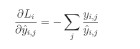

After substitution to the combined derivative’s equation:

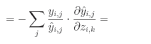

Now, as we calculated before, the partial derivative of the Softmax activation, before applying Kronecker delta to it:
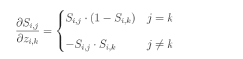
Let’s actually do the substitution of the ​S​i,j​ with ​y-hat​i,j​ here as well:

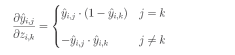

The solution is different depending on if ​j=k​ or ​j≠k​. To handle for this situation, we have to split the current partial derivative following these cases — when they both match and when they do not:
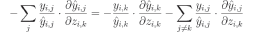

For the ​j≠k​ case, we just updated the sum operator to exclude ​k​ and that’s the only change:


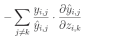

For the ​j=k​ case, we do not need the sum operator as it will sum only one element, of index ​k​. For

the same reason, we also replace ​j​indices with ​k​:


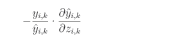

Back to the main equation:

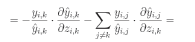


Now we can substitute the partial derivatives of the activation function for both cases with the newly-defined solutions:

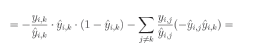
​ ​ from both sides of the subtraction in the equation — both contain it We can cancel out the ​y-hati,k as part of the multiplication operations and in their denominators. Then on the “right” side of the equation, we can replace 2 minus signs with the plus one and remove the parentheses:

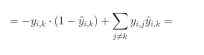

Now let’s multiply the ​-y​i,k​ with the content of the parentheses on the “left” side of the equation:

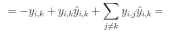



Now let’s look at the sum operation — it adds up ​y​i,j​y-hat​i,k​ over all possible values of index j​ except for when it equals ​k.​ Then, on the left of this part of the equation, we have y​i,ky-hat ​ ​ ,​ which contains ​yi,k i,k ​ ​ — the exact element that is excluded from the sum. We can then join both expressions:
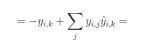


Now the sum operator iterates over all of the possible values of ​j​ and, since we know that ​yi,j​ ​ for each ​i​ is the one-hot encoded vector of ground-truth values, the sum of all of its elements equals 1.​ In other words, following the earlier explanation in this chapter — this sum will multiply ​0​ by the ​y-hat​i,k​ except for a single situation, the true label, where it’ll multiply ​1​ by this value. We can then simplify it further to:

Full solution:

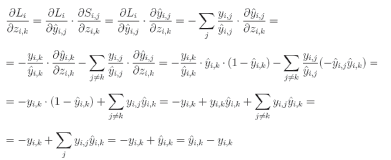

As we can see, when we apply the chain rule to both partial derivatives, the whole equation simplifies significantly to the subtraction of the predicted and ground truth values. It is also multiple times faster to compute.



## Common Categorical Cross-Entropy loss and Softmax activation derivative - code implementation 

To code this solution, nothing in the forward pass changes — we still need to perform it on the activation function to receive the outputs and then on the loss function to calculate the loss value. For backpropagation, we’ll create the backward step containing the implementation of the new equation, which calculates the combined gradient of the loss and activation functions. We’ll code the solution as a separate class, which initializes both the Softmax activation and the Categorical Cross-Entropy objects, calling their forward methods respectively during the forward pass. Then the new backward pass is going to contain the new code:

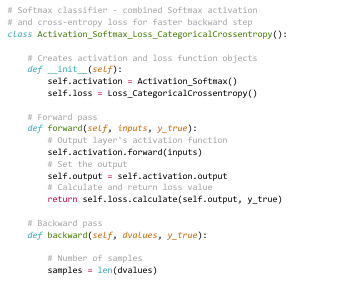

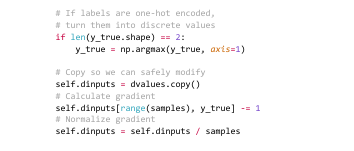

To implement the solution ​y-hati,k ​ -y ​ ,​ instead of performing the subtraction of the full arrays, ​ i,k we’re taking advantage of the fact that the ​y​ being ​y_true​ in the code consists of one-hot encoded vectors, which means that, for each sample, there is only a singular value of ​1​ in these vectors and the remaining positions are filled with zeros. This means that we can use NumPy to index the prediction array with the sample number and its true value index, subtracting ​1​ from these values. This operation requires discrete true labels instead of one-hot encoded ones, thus the additional code that performs the transformation if needed — If the number of dimensions in the ground-truth array equals ​2,​ it means that it’s a matrix consisting of one-hot encoded vectors. We can use ​np.argmax()​, which returns the index of the maximum value (index for ​1​ in this case), but we need to perform this operation sample-wise to get a vector of indices:

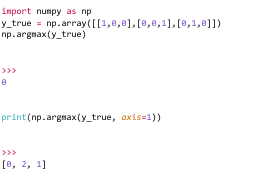

For the last step, we normalize the gradient in exactly the same way and for the same reason as described along with the Categorical Cross-Entropy gradient normalization.

Let’s summarize the code for each of the classes that we have updated:

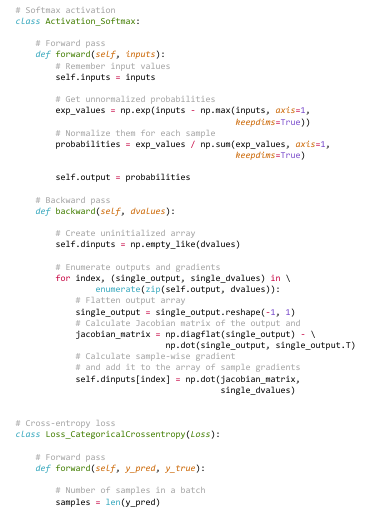
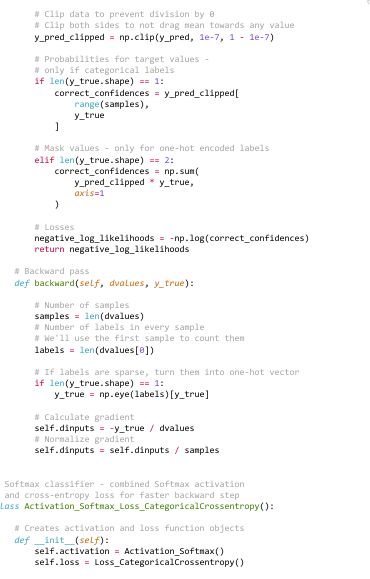


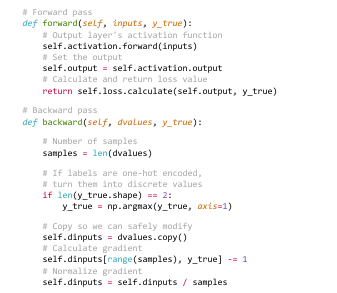

We can now test if the combined backward step returns the same values compared to when we backpropagate gradients through both of the functions separately. For this example, let’s make up an output of the Softmax function and some target values. Next, let’s backpropagate them using both solutions:

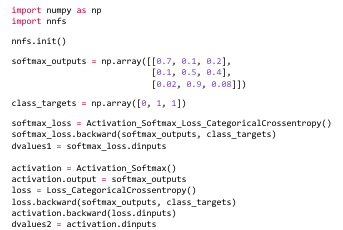
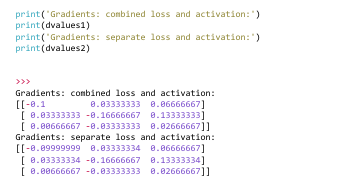


The results are the same. The small difference between values in both arrays results from the precision of floating-point values in raw Python and NumPy. To answer the question of how many times faster this solution is, we can take advantage of Python’s timeit module, running both solutions multiple times and combining the execution times. A full description of the timeit module and the code used here is outside of the scope of this book, but we include this code purely to show the speed deltas:
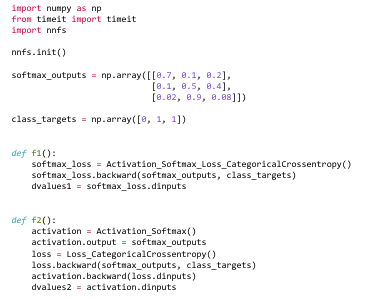

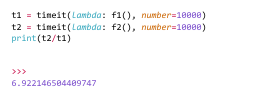


Calculating the gradients separately is about 7 times slower. This factor can differ from a machine to a machine, but it clearly shows that it was worth putting in additional effort to calculate and code the optimized solution of the combined loss and activation function derivative. Let’s take the code of the model and initialize the new class of combined accuracy and loss class’ object:
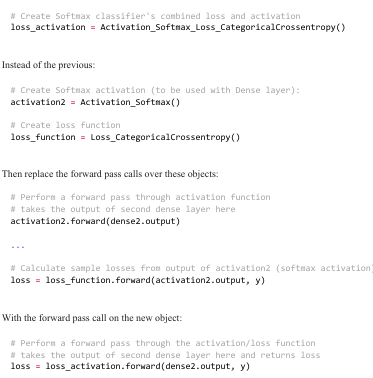
And finally add the backward step and printing gradients:
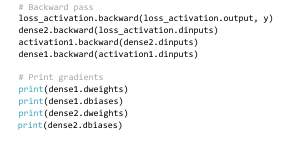

Full model code:
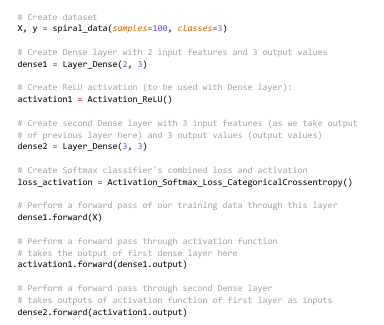

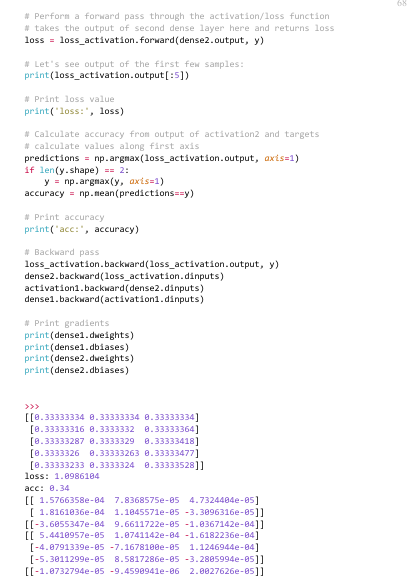


t this point, thanks to gradients and backpropagation using the chain rule, we’re able to adjust he weights and biases with the goal of lowering loss, but we’d be doing it in a very rudimentary ay. This process of adjusting weights and biases using gradients to decrease loss is the job of the optimizer, the next chapter.


## Steps for fulla code

### Data Function: 

The code assumes the existence of a spiral_data function to generate the dataset. If you don't have one, you can use any dataset creation function that provides features X and labels y.

### Softmax and Cross-Entropy Combination: 

Softmax and categorical cross-entropy are combined into one class to streamline the backward pass.

### Backpropagation: 

The gradients are calculated and propagated through the network, allowing for the training process to adjust weights and biases.

In [2]:
import numpy as np

def spiral_data(samples, classes):
    """
    Generates a 2D spiral dataset with a specified number of samples and classes.

    :param samples: Number of points per class
    :param classes: Number of classes (spirals)
    :return: Tuple (X, y) where X is the features and y are the labels
    """
    X = np.zeros((samples * classes, 2))  # Feature matrix (2D points)
    y = np.zeros(samples * classes, dtype='uint8')  # Class labels
    
    for class_number in range(classes):
        ix = range(samples * class_number, samples * (class_number + 1))
        r = np.linspace(0.0, 1, samples)  # Radius
        theta = np.linspace(class_number * 4, (class_number + 1) * 4, samples) + np.random.randn(samples) * 0.2  # Theta (angle)
        X[ix] = np.c_[r * np.sin(theta), r * np.cos(theta)]
        y[ix] = class_number
    
    return X, y

# Example usage:
X, y = spiral_data(samples=100, classes=3)


In [3]:
import numpy as np

# Dense layer class
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    # Forward pass
    def forward(self, inputs):
        # Remember input values for backpropagation
        self.inputs = inputs
        # Calculate output values from inputs, weights, and biases
        self.output = np.dot(inputs, self.weights) + self.biases

    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values (for previous layer)
        self.dinputs = np.dot(dvalues, self.weights.T)


# ReLU activation class
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Apply the ReLU function
        self.output = np.maximum(0, inputs)

    # Backward pass
    def backward(self, dvalues):
        # Copy dvalues to modify them safely
        self.dinputs = dvalues.copy()
        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0


# Softmax activation class
class Activation_Softmax:
    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate exponentiated values (shifted for numerical stability)
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        # Normalize them to get probabilities
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)

    # Backward pass
    def backward(self, dvalues):
        # Create an uninitialized array for gradients
        self.dinputs = np.empty_like(dvalues)
        # Enumerate samples and gradients
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            # Calculate Jacobian matrix of the output
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
            # Calculate sample-wise gradient
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)


# Loss base class
class Loss:
    # Calculates the data and regularization losses
    def calculate(self, output, y):
        # Calculate sample losses
        sample_losses = self.forward(output, y)
        # Return the mean loss
        return np.mean(sample_losses)


# Categorical cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples
        samples = len(y_pred)
        # Clip data to prevent division by zero
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        # If labels are sparse, extract probabilities for the correct class
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        # Mask values for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample (assume the first sample's shape)
        labels = len(dvalues[0])
        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]
        # Calculate the gradient
        self.dinputs = -y_true / dvalues
        # Normalize the gradient
        self.dinputs /= samples


# Combined Softmax activation and cross-entropy loss
class Activation_Softmax_Loss_CategoricalCrossentropy:
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Perform the softmax activation
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss
        return self.loss.calculate(self.output, y_true)

    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # If labels are one-hot encoded, turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize the gradient
        self.dinputs /= samples


# Example usage:

# Dataset creation (spiral_data function should be defined)
X, y = spiral_data(samples=100, classes=3)

# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer)
activation1 = Activation_ReLU()

# Create second Dense layer with 3 input features (as output of previous layer) and 3 output values
dense2 = Layer_Dense(3, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Forward pass
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)

# Compute loss
loss = loss_activation.forward(dense2.output, y)

# Print outputs and loss
print("Output:\n", loss_activation.output[:5])  # First 5 samples
print('Loss:', loss)

# Accuracy calculation
predictions = np.argmax(loss_activation.output, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
accuracy = np.mean(predictions == y)
print('Accuracy:', accuracy)

# Backward pass
loss_activation.backward(loss_activation.output, y)
dense2.backward(loss_activation.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)

# Print gradients
print("Dense 1 gradients:\nWeights:\n", dense1.dweights, "\nBiases:\n", dense1.dbiases)
print("Dense 2 gradients:\nWeights:\n", dense2.dweights, "\nBiases:\n", dense2.dbiases)


Output:
 [[0.33333333 0.33333333 0.33333333]
 [0.33333467 0.33333282 0.33333251]
 [0.33333597 0.33333245 0.33333159]
 [0.33333728 0.33333177 0.33333095]
 [0.33333869 0.33333133 0.33332998]]
Loss: 1.0986323184959648
Accuracy: 0.19666666666666666
Dense 1 gradients:
Weights:
 [[-4.61193789e-04 -5.41289832e-04 -3.08862882e-04]
 [ 9.73255123e-04  4.49942234e-05 -6.35256671e-04]] 
Biases:
 [[ 0.00089221 -0.00114178  0.00132587]]
Dense 2 gradients:
Weights:
 [[ 5.94969252e-04 -8.10187186e-04  2.15217934e-04]
 [ 2.19675510e-04 -1.01357169e-03  7.93896178e-04]
 [-9.32399765e-04  8.90440469e-04  4.19592963e-05]] 
Biases:
 [[ 1.80008608e-05  1.59127141e-06 -1.95921322e-05]]


Next Chapter ---> Optimizers